### 목차
1. 부분집합
2. 조합
3. 탐욕 알고리즘 : 문제 유형을 많이 보는게 좋음

# 부분집합
- 집합에 포함된 원소들을 선택하는 것
- 아무것도 선택하지 않은 경우도 집합에 포함된다(=공집합)

### 집합에서 부분 집합을 찾아내는 구현 방법
1. 완전 탐색
    - 재귀호출을 이용한 완전탐색으로, 부분집합을 구할 수 있다.
    - 실전보다는 완전탐색 학습용으로 추천하는 방법
2. Binary Counting
    - 2진수 & 비트연산을 이용하여, 부분 집합을 구할 수 있다.
    - 부분 집합이 필요할 때 사용하는 추천 방법


In [1]:
# 부분집합_재귀

arr = ['O', 'X']        # 공집합부터 출력하고 싶으면 값의 순서를 바꾸면 됨
path = []
name = ['MIN', 'CO', 'TIM']


# path 출력 함수
def print_name():
    print(path, end=' / ')
    print('{ ', end='')
    for i in range(3):
        if path[i] == 'O':
            print(name[i], end=' ')
    print('}')


def run(lev):
    # 3개를 뽑았을 때 출력
    if lev == 3:
        print_name()
        return

    for i in range(2):
        path.append(arr[i])
        run(lev + 1)
        path.pop()


run(0)


['O', 'O', 'O'] / { MIN CO TIM }
['O', 'O', 'X'] / { MIN CO }
['O', 'X', 'O'] / { MIN TIM }
['O', 'X', 'X'] / { MIN }
['X', 'O', 'O'] / { CO TIM }
['X', 'O', 'X'] / { CO }
['X', 'X', 'O'] / { TIM }
['X', 'X', 'X'] / { }


### 바이너리 카운팅
- 원소 수에 해당하는 N개의 비트열을 이용한다

- 만들 수 있는 집합의 총 개수는 2^n 이며, n = 3이면 총 8개이다
- 2^n 은 `1<<n` 공식을 이용하여 빠르게 구할 수 있다.
    - ex) N = 5 , `1<<5`는 2진수로는 100000, 10진수로는 32를 의미함

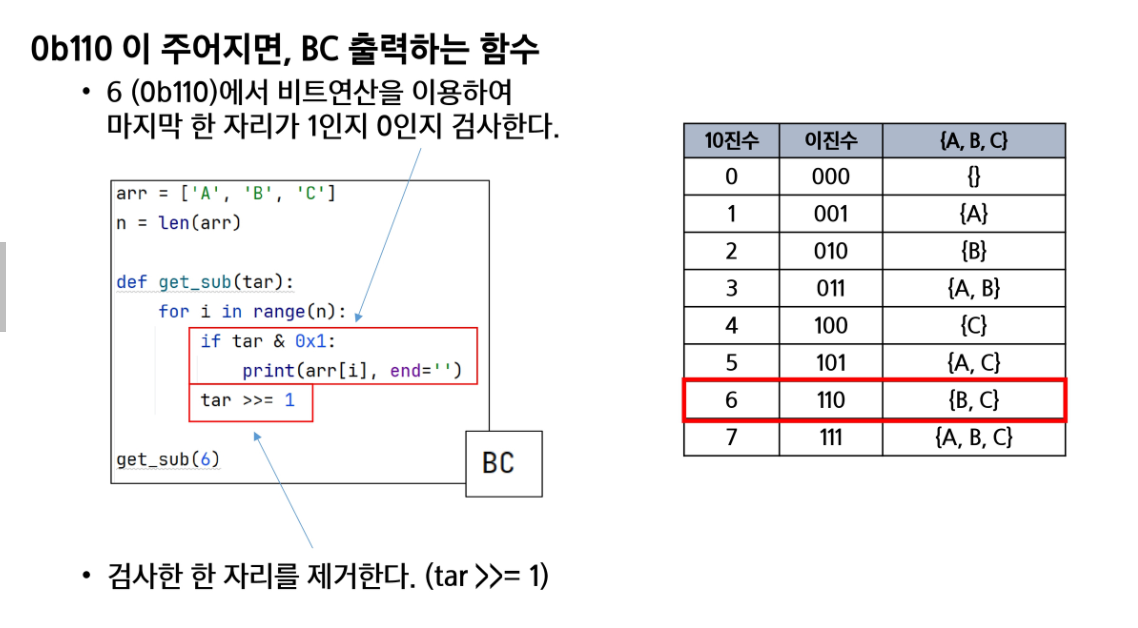
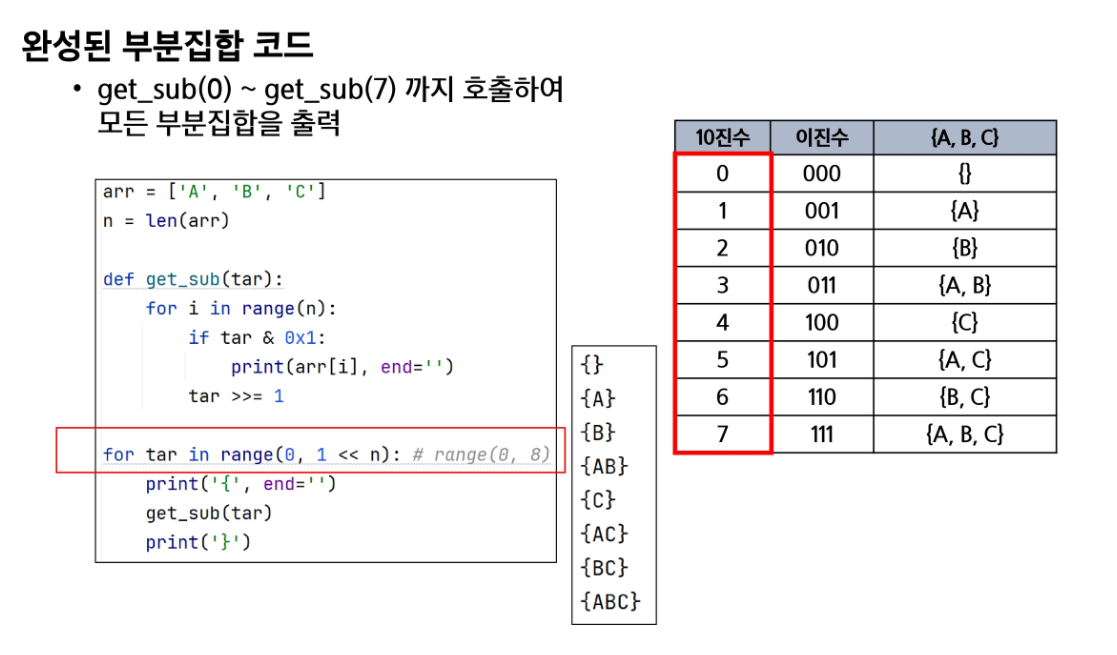
    

In [ ]:
# 부분집합_바이너리카운팅

arr = ['A', 'B', 'C']
n = len(arr)


def get_sub(tar):
    for i in range(n):
        if tar & 0x1:
            print(arr[i], end='')
        tar >>= 1


for tar in range(0, 1 << n):  # range(0, 8)
    print('{', end='')
    get_sub(tar)
    print('}')


In [ ]:
# [도전] 친구와 카페 방문

arr = ['A', 'B', 'C', 'D', 'E']
n = len(arr)


# 총 몇개의 bit가 1로 되어있는지 확인하는 함수
def get_count(tar):
    cnt = 0
    for i in range(n):
        if tar & 0x1:
            cnt += 1
        tar >>= 1
    return cnt


result = 0
for tar in range(0, 1 << n):  # range(0, 8)
    if get_count(tar) >= 2:  # bit가 2개 이상 1 이라면,
        result += 1
print(result)


# 조합
- 서로 다른 n개의 원소 중 r개를 순서 없이 골라낸 것을 조합(combination)이라고 한다.
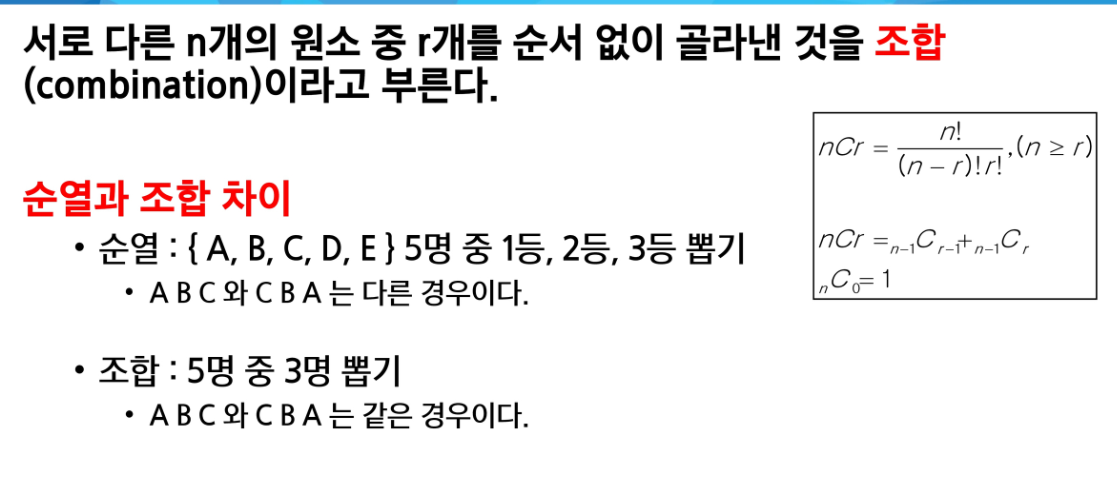
- ABC와 ACB를 조합에선 같은 것으로, 순열에선 다른 것으로 본다
- K개를 선택할 때까지 후보군이 N부터 1씩 감소한다

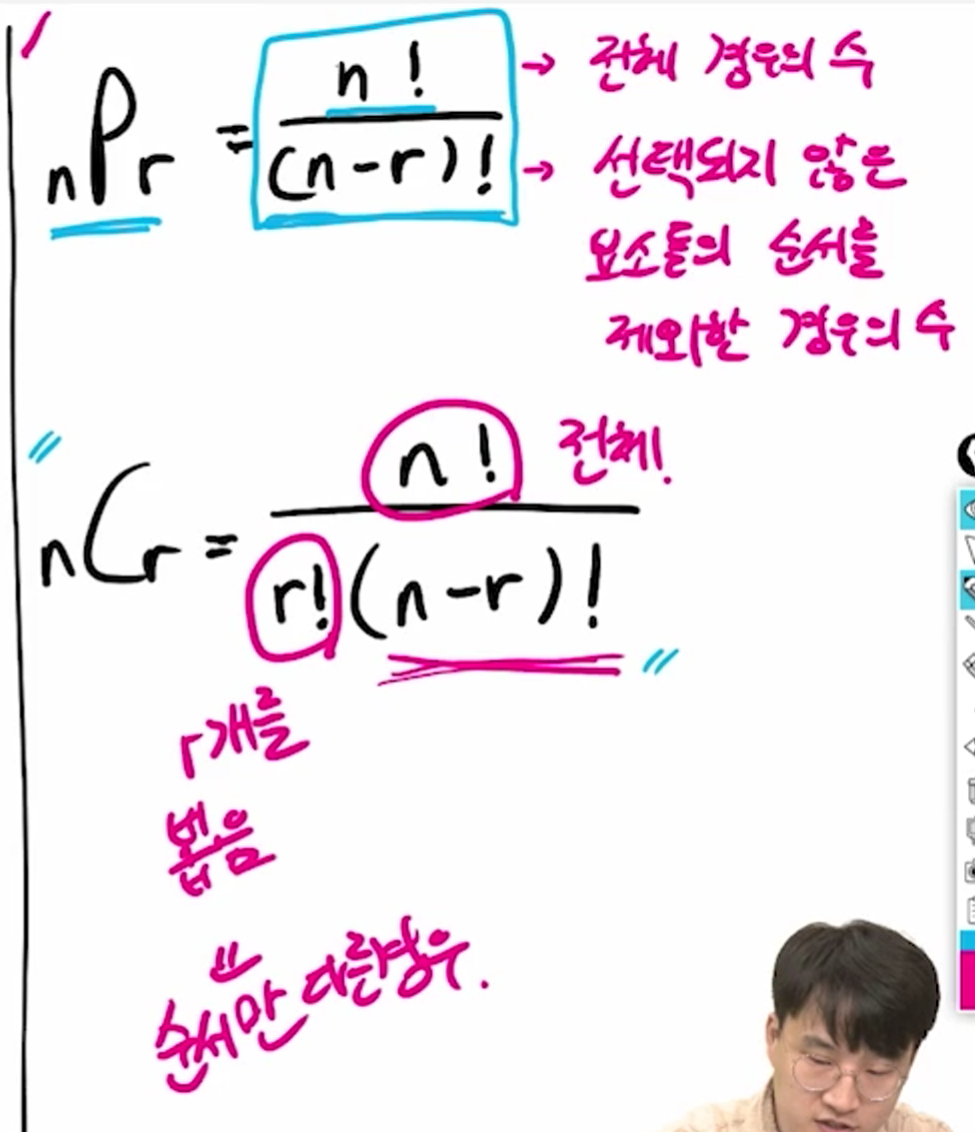
![6- for문으로 표현.png](<attachment:6- for문으로 표현.png>)
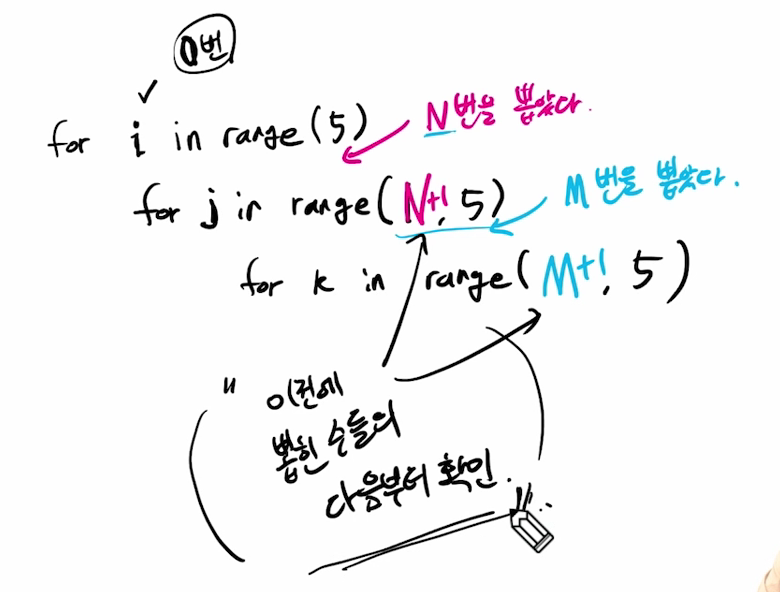

- {A,B,C,D,E} 5명 중 3명 뽑을 수 있는 모든 경우

![6- for문으로 표현.png](<attachment:6- for문으로 표현.png>)
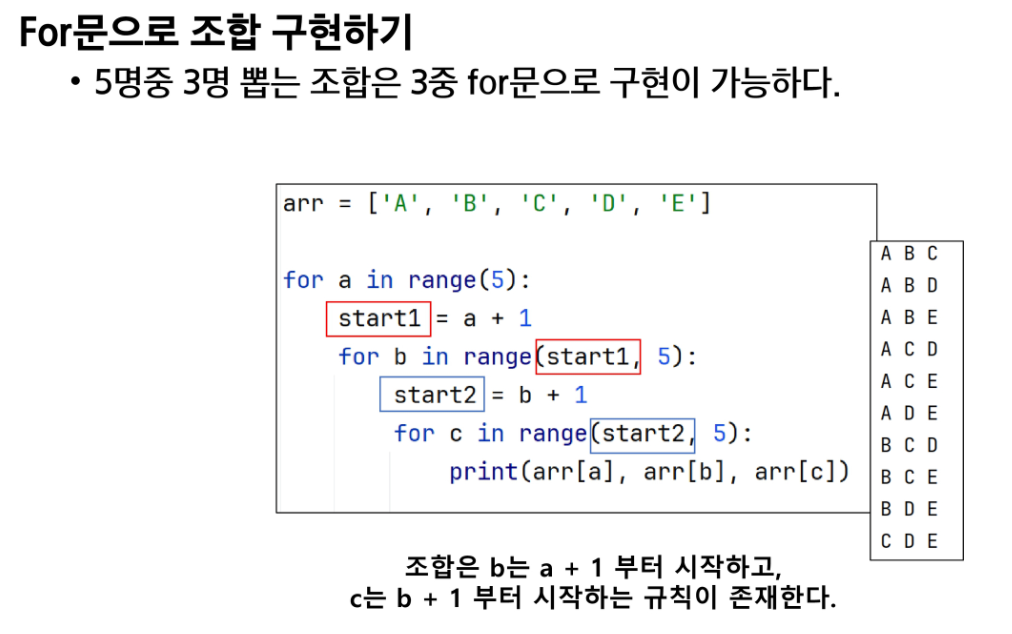

- 5명 중 3명을 뽑는 코드는 3중 for문으로 구현이 가능
- 5명 중 n명을 뽑는 코드는 n중 for문 필요!
- 즉 재귀호출 구현이 필요함!(branch 5개, level n개)

In [2]:
# 조합_재귀

arr = ['A', 'B', 'C', 'D', 'E']
path = []
n = 3


def run(lev, start):
    if lev == n:
        print(*path)
        return

    for i in range(start, 5):
        path.append(arr[i])
        run(lev + 1, i + 1)
        path.pop()


run(0, 0)

A B C
A B D
A B E
A C D
A C E
A D E
B C D
B C E
B D E
C D E


In [ ]:
# [도전] 주사위던지기

N = 3
path = []


def run(lev, start):
    if lev == N:
        print(path)
        return

    for i in range(start, 7):
        path.append(i)
        run(lev + 1, i)
        path.pop()


run(0, 1)


# Greedy
- 결정이 필요할 때, 현재 기준으로 가장 좋아보이는 선택지로 결정하여 답을 도축하는 알고리즘
- 대표적인 문제해결기법
    1. 완전 탐색(Brute-Force)
        - 답이 될 수 있는 모든 경우를 시도해보는 알고리즘
    2. Greedy
        - 결정이 필요할 때 가장 좋아보이는 선택지로 결정하는 알고리즘
    3. DP
        - 현재에서 가장 좋아보이는 것을 선택하는 것이 아니라,  
        과거의 데이터를 이용하여 현재의 데이터를 만들어내는 문제해결 기법
    4. 분할정복
        - 큰 문제를 작은 문제로 나누어 해결하는 문제해결기법
- 대표적인 문제 케이스를 알아두는게 좋음
    - 동전 교환, 화장실 이용, 회의실 사용과 같이 한 명이 작업하고 있을 때 나머지사람들의 대기 시간 또는 비용 지불, 순서대로 들어가기 등의 문제에 활용 가능




### 동전 교환
- 최대를 고려했을 때 정답인 케이스
- 최소 개수를 구하는 문제
- 나누어떨어져야 조건을 만족함(ex) 5,20,100)
- 100원을 거슬러줘야 할 때 동전이 10,50,70인 경우 예외가 발생할 수 있다
    - 그리디로 접근하면 70, 10*3 = 4개 동전이 필요
    - 50*2를 하면 2개 동전만 필요
    - 이런 경우엔 그리디를 사용하지 않는다

### 그리디가 성립하는 경우 vs 그리디가 성립하지 않는 경우
- 10,50,100,500 처럼 모든 동전이 배수관계인 경우 그리디가 성립한다.
- 10,50,70처럼 모든 동전이 배수관계가 아닌 경우는 그리디가 성립하지 않는다
- 예외 없이 모든 경우가 맞는 규칙인지 아닌지 증명이 어렵다


### 그리디의 핵심 조건(참고)
- 탐욕적 선택 조건(Greedy Choice Property): 각 단계의 선택이 이후 선택에 영향을 주지 않는다.
- 최적 부분 구조(Optimal Substructure): 각 단계의 최선의 선택이, 전체 문제의 최선의 해가 된다.

- 예시) 
    - 대구 - 충주 - 대전 - 역삼 멀티캠퍼스 모든 캠퍼스를 들려야할 때 최단 경로 구하기
    - 대구-충주, 충주-대전, 대전-역삼 각각의 최단경로를 구하면 그 합이 전체의 최단경로이다
    - 각각의 경로는 서로에게 영향을 미치지 않는다


- 구현 시 고려해야할 사항
1. 각 단계에서 최적해를 찾아야 한다
2. 단계의 결과들을 합하는 방법을 찾아야 한다
3. 각 단계의 합 == 전체 문제의 합임을 증명해야 한다.


In [3]:
# 그리디_동전교환



coin_list = [500, 100, 50, 10]
target = 1730
cnt = 0

for coin in coin_list:
    possible_cnt = target // coin  # 사용 가능한 동전의 수로 나눔 (ex) 500원이라면 3개 가능)
    
    cnt += possible_cnt  # 동전의 수를 정답에 추가
    target -= coin * possible_cnt  # 동전 금액 만큼 빼준다.

print(cnt)


8


### 화장실
- 기숙사에 하나의 화장실만 존재한다
- A,B,C,D 학생의 평균 화장실 사용 시간은 15분, 30분, 50분, 10분이다
- A가 먼저 화장실을 이용한다면 나머지는 대기를 해야하고, 대기시간의 총 합은 15x3 = 45분이다.
- 대기 시간의 누적합이 최소가 되는 경우는?


- 경우의 수 고려하기
1. C만 뒤로 넘기자
    - C 외의 나머지가 순서에 상관 없어야 유효함 
    - 하지만 상관있기때문에 반례가 있음
2. 가장 큰 시간부터 빼자
    - 최대시간이 나옴
3. 작은 값부터 들어가자
    - 최소시간이 나옴! 채택!

In [ ]:
# 그리디_화장실

person = [15, 30, 50, 10]
n = len(person)
person.sort()  # [10, 15, 30, 50] 오름차순 정렬

total = 0
left_person = n - 1  # 화장실을 이용 아직 못한 대기자의 수

for turn in range(n):
    time = person[turn]
    total += left_person * time
    left_person -= 1

print(total)

### 보물 사냥꾼(Knapsack)
- 문제
    - 보물이 있는 창고에 들어온 도둑이 최대 30kg까지 훔쳐갈 수 있을 때 도둑이 최대 이득을 볼 수 있는 경우를 구하시오
    - [물건1] 5kg, 50만원 [물건2] 10kg, 60만원 [물건3] 20kg, 140만원
    - 물건은 하나씩만 존재한다
- 풀이
    - 그리디방법으로 풀면 kg당 가치가 가장 높은 물건1을 먼저 담겠지만,  
    실제론 물건2와 물건3을 담는 것이 더 큰 이득을 볼 수 있으므로 예외가 존재한다
    - 이와같이, 0과 1로 나뉘는 경우(훔치냐 안훔치냐)의 경우의 수를 고려하는 경우엔 그리디를 적용하기 어렵다
    - 완전탐색 또는 DP로 접근해야 한다

### Fractional Knapsack 문제
    - 위 문제와 달리, 물건을 원하는 만큼 자를 수 있다면 그리디 적용 가능!
    - 자를 수 있다면(나눠담아갈 수 있다면) 단위가격이 높은 걸 챙기면 된다

In [ ]:
# fractional knapsack

n = 3
target = 30  # Knapsack KG
things = [(5, 50), (10, 60), (20, 140)]  # (Kg, Price)

# (Price / Kg) 기준으로 내림차순 sort
things.sort(key=lambda x: (x[1] / x[0]), reverse=True)
# sort 결과 = [(5, 50), (20, 140), (10, 60)]
print(things)

total = 0
for kg, price in things:
    per_price = price / kg

    # 만약 가방에 남은 용량이 얼마되지 않는다면,
    # 물건을 잘라 가방에 넣고 끝낸다.
    if target < kg:
        total += target * per_price
        break

    total += price
    target -= kg

print(int(total))


# 회의실 배정(활동선택문제)
- 문제
    - 여러 팀들이 원하는 회의실 예약 시간이 주어질 때 가능한 많은 회의가 열리기 위해서는 회의들을 어떻게 배정해야 할까?
- 후보군
1. 짧은 것부터 고르자
2. 먼저 시작하는 것부터 고르자 (3의 반례)
3. 먼저 끝나는 것부터 고르자! (채택)
- 풀이
1. 종료 시간 기준으로 10개의 회의들을 오름차순 정렬한다.
2. 종료시간이 가장 빠른 회의를 찾자 마자, 확정시킨다.
3. 이후로 가능한 시간 중 가장 빨리 끝나는 회의를 찾아 확정한다.(반복)


In [5]:
# 회의실 배정

'''
input

11
1 4
3 5
0 6
5 7
3 8
5 9
6 10
8 11
8 12
2 13
12 14
'''

T = int(input())
li = []
for _ in range(T):
    li.append(list(map(int, input().split())))

# 1. 끝나는 시간 / 2. 빨리 시작하는 시간 순서대로 정렬되어야 한다.
li.sort(key=lambda x: (x[1], x[0]))
# [[1, 4], [3, 5], [0, 6], [5, 7], [3, 8], [5, 9], [6, 10], [8, 11], [8, 12], [2, 13], [12, 14]]
# 끝나는 시간대로 정렬된 상태

print(li)

cnt = 0
end = -1
for meeting in li:
    # 끝나는 시간보다 크거나 같다 == 회의가 시작할 수 있다.
    # 즉, 회의가 시작할 수 있다면
    # 1. 정답에 1 추가
    # 2. 끝나는 시간 초기화
    if meeting[0] >= end:
        cnt += 1
        end = meeting[1]

print(cnt)


KeyboardInterrupt: Interrupted by user

In [6]:
#[연습문제3] 부분집합의 합

numbers = [-1, 3, -9, 6, 7, -6, 1, 5, 4, -2]
cnt = 0  # 총 몇가지인지 계산
path = []


def recur(now, total):
    global cnt
    if now == 10:
        return

    if total + numbers[now] == 0:
        print(path + [numbers[now]])
        cnt += 1

    # 현재 수를 사용하지 않는 경우
    recur(now + 1, total)

    # 현재 수를 사용하는 경우: 경로에 추가, 누적합에 계산
    path.append(numbers[now])
    recur(now + 1, total + numbers[now])
    path.pop()


recur(0, 0)
print(f'총 {cnt}가지')


[-6, 1, 5]
[7, -6, 1, -2]
[6, -6]
[-9, 5, 4]
[-9, 7, 4, -2]
[-9, 7, -6, 1, 5, 4, -2]
[-9, 6, 5, -2]
[-9, 6, 1, 4, -2]
[-9, 6, -6, 5, 4]
[-9, 6, 7, -6, 4, -2]
[3, -6, 5, -2]
[3, -6, 1, 4, -2]
[3, -9, 6]
[3, -9, 1, 5]
[3, -9, 7, 1, -2]
[3, -9, 7, -6, 5]
[3, -9, 7, -6, 1, 4]
[3, -9, 6, -6, 1, 5]
[3, -9, 6, 7, -6, 1, -2]
[-1, 1]
[-1, -6, 5, 4, -2]
[-1, 7, -6]
[-1, 6, -6, 1]
[-1, -9, 1, 5, 4]
[-1, -9, 7, 5, -2]
[-1, -9, 7, 1, 4, -2]
[-1, -9, 7, -6, 5, 4]
[-1, -9, 6, 4]
[-1, -9, 6, 1, 5, -2]
[-1, -9, 6, -6, 1, 5, 4]
[-1, -9, 6, 7, -6, 5, -2]
[-1, -9, 6, 7, -6, 1, 4, -2]
[-1, 3, -2]
[-1, 3, -6, 4]
[-1, 3, -6, 1, 5, -2]
[-1, 3, 6, -6, -2]
[-1, 3, -9, 7]
[-1, 3, -9, 5, 4, -2]
[-1, 3, -9, 7, -6, 1, 5]
[-1, 3, -9, 6, 1]
[-1, 3, -9, 6, -6, 5, 4, -2]
[-1, 3, -9, 6, 7, -6]
총 42가지
